### importing essential libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

### loading data

In [2]:
data=pd.read_csv('insurance.csv')

### displaying first five rows

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### displaying last five rows

In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### finding shape of our dataset

In [5]:
data.shape

(1338, 7)

### getting information about dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### checking null values in the dataset

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### checking statistics of data set

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### converting string values to numerical values

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [14]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### storing independent and dependent variables separately

In [20]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
X=data.drop(['charges'],axis=1)

In [22]:
y=data['charges']

### train/test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### importing models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [28]:
ypred1=lr.predict(X_test)
ypred2=svm.predict(X_test)
ypred3=rf.predict(X_test)
ypred4=gr.predict(X_test)

In [29]:
df1=pd.DataFrame({'Actual':y_test,'lr':ypred1,'svm':ypred2,'rf':ypred3,'gr':ypred4})

In [30]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10498.084856,11001.128629
887,5272.17580,7116.295018,9492.515425,5418.331295,5840.174656
890,29330.98315,36909.013521,9648.758701,28146.695636,28001.980112
1293,9301.89355,9507.874691,9555.044136,10686.512876,9745.291602
259,33750.29180,27013.350008,9420.421978,34428.832414,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46971.853772,45431.423211
575,12222.89830,11814.555568,9625.431547,12371.555816,12465.025294
535,6067.12675,7638.107736,9504.168517,6345.918753,6974.336525
543,63770.42801,40959.081722,9605.004594,46628.823905,47862.047791


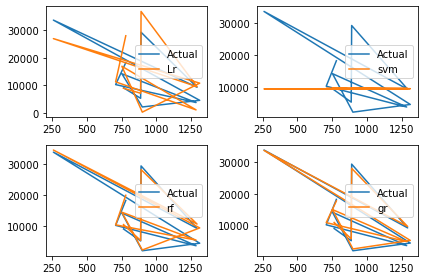

In [36]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='Lr')
plt.legend()
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')

plt.legend()
plt.tight_layout()

### evaluating the algorithm

In [38]:
from sklearn import metrics

In [40]:
score1=metrics.r2_score(y_test,ypred1)
score2=metrics.r2_score(y_test,ypred2)
score3=metrics.r2_score(y_test,ypred3)
score4=metrics.r2_score(y_test,ypred4)

In [41]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8634870089543506 0.8779726251291786


In [42]:
s1=metrics.mean_absolute_error(y_test,ypred1)
s2=metrics.mean_absolute_error(y_test,ypred2)
s3=metrics.mean_absolute_error(y_test,ypred3)
s4=metrics.mean_absolute_error(y_test,ypred4)

In [43]:
print(s1,s2,s3,s4)

4186.508898366435 8592.428727899724 2485.2902029139 2447.9515580545844


### predicting charges for new customer

In [45]:
data={'age':40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2}

In [46]:
df2=pd.DataFrame(data,index=[0])

In [47]:
df2

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [48]:
new_pred=gr.predict(df2)
print(new_pred)

[43839.34586293]
